# **Credit Card Fraud Detection**

## **1. Import and Check the Data**

Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import credit card dataset from Kaggle

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#Print the first 5 rows out
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Now, we check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Now, we check for duplicated values
df.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

In [7]:
#Looking closer at the duplicated values
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [8]:
#Drop all duplicate rows.
df = df.drop_duplicates(keep=False)
print(df.duplicated(keep=False).value_counts())

False    282953
Name: count, dtype: int64


Dataframe has 284807 rows and 31 columns.
Data set does not have any missing values.
Feature names are hidden due to privacy policies.
Dataset had some duplicates that we can drop

## **2.Exploratory Data Analysis**

In [9]:
# Check distribution of target variable.
print((df['Class'].value_counts()))
print((df['Class'].value_counts() / len(df)) * 100)

Class
0    282493
1       460
Name: count, dtype: int64
Class
0    99.837429
1     0.162571
Name: count, dtype: float64


Note:From checking the distribution of the target variable:
Dataset Class variable is very unbalanced.
0(Legit Transactions) = 282,493
1(Fraud Transactions) = 460

In [10]:
# Get stats on all our data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,...,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000
mean,94816.256714,0.010161,-0.006837,0.002906,-0.004665,0.003311,-0.001734,0.002985,-0.002038,-0.002651,...,-0.000316,0.000184,0.000332,0.000372,-0.000347,0.000317,0.002830,0.000740,88.534756,0.001626
std,47479.631543,1.940990,1.643708,1.504189,1.413356,1.374938,1.331984,1.223249,1.173378,1.094047,...,0.721104,0.724223,0.623093,0.605599,0.521199,0.481876,0.391139,0.327223,250.567570,0.040287
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54213.000000,-0.912989,-0.601721,-0.888987,-0.851101,-0.688407,-0.769506,-0.551470,-0.209036,-0.645213,...,-0.228236,-0.542743,-0.161658,-0.354423,-0.317659,-0.326567,-0.070453,-0.052736,5.590000,0.000000
50%,84704.000000,0.022459,0.062929,0.180273,-0.023625,-0.052817,-0.275914,0.041333,0.021522,-0.052847,...,-0.029370,0.007041,-0.011184,0.041074,0.016162,-0.052152,0.001564,0.011312,22.000000,0.000000
75%,139294.000000,1.316582,0.797751,1.027190,0.737319,0.612704,0.395220,0.570666,0.324281,0.594912,...,0.186184,0.528316,0.147729,0.439880,0.350621,0.239885,0.091310,0.078270,77.710000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
# Get Stats on our Fraudulent data
df[df['Class'] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.0
mean,80087.628261,-4.376653,3.311484,-6.534364,4.407571,-2.830642,-1.406285,-4.986946,0.975510,-2.470670,...,0.394720,0.100917,-0.105252,-0.111322,0.038273,0.043374,0.236649,0.082442,124.045239,1.0
std,49184.572128,6.545198,4.087554,6.815182,2.866106,5.232600,1.675472,6.747278,5.295332,2.459604,...,2.419816,1.107206,1.505393,0.519905,0.813572,0.455627,1.189543,0.528294,262.620752,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-2.797150,-19.254328,-2.028024,-4.781606,-1.152671,-5.682338,-1.869290,0.000000,1.0
25%,41168.500000,-5.279483,1.133389,-7.607249,2.244446,-4.065895,-2.402803,-6.685014,-0.166764,-3.743865,...,0.014158,-0.524324,-0.337465,-0.439295,-0.325570,-0.263588,-0.007476,-0.074475,1.000000,1.0
50%,70403.000000,-2.193383,2.537079,-4.754523,4.012207,-1.243073,-1.353658,-2.800738,0.568659,-2.030056,...,0.561184,0.056418,-0.074621,-0.063824,0.072204,0.010752,0.394926,0.146344,9.250000,1.0
75%,129243.500000,-0.261519,4.495789,-2.083111,6.219208,0.317456,-0.396050,-0.870475,1.689912,-0.778617,...,1.185694,0.617474,0.286608,0.272451,0.464135,0.390734,0.794383,0.372382,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,10.005998,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Now we show the distribution of all data as histograms

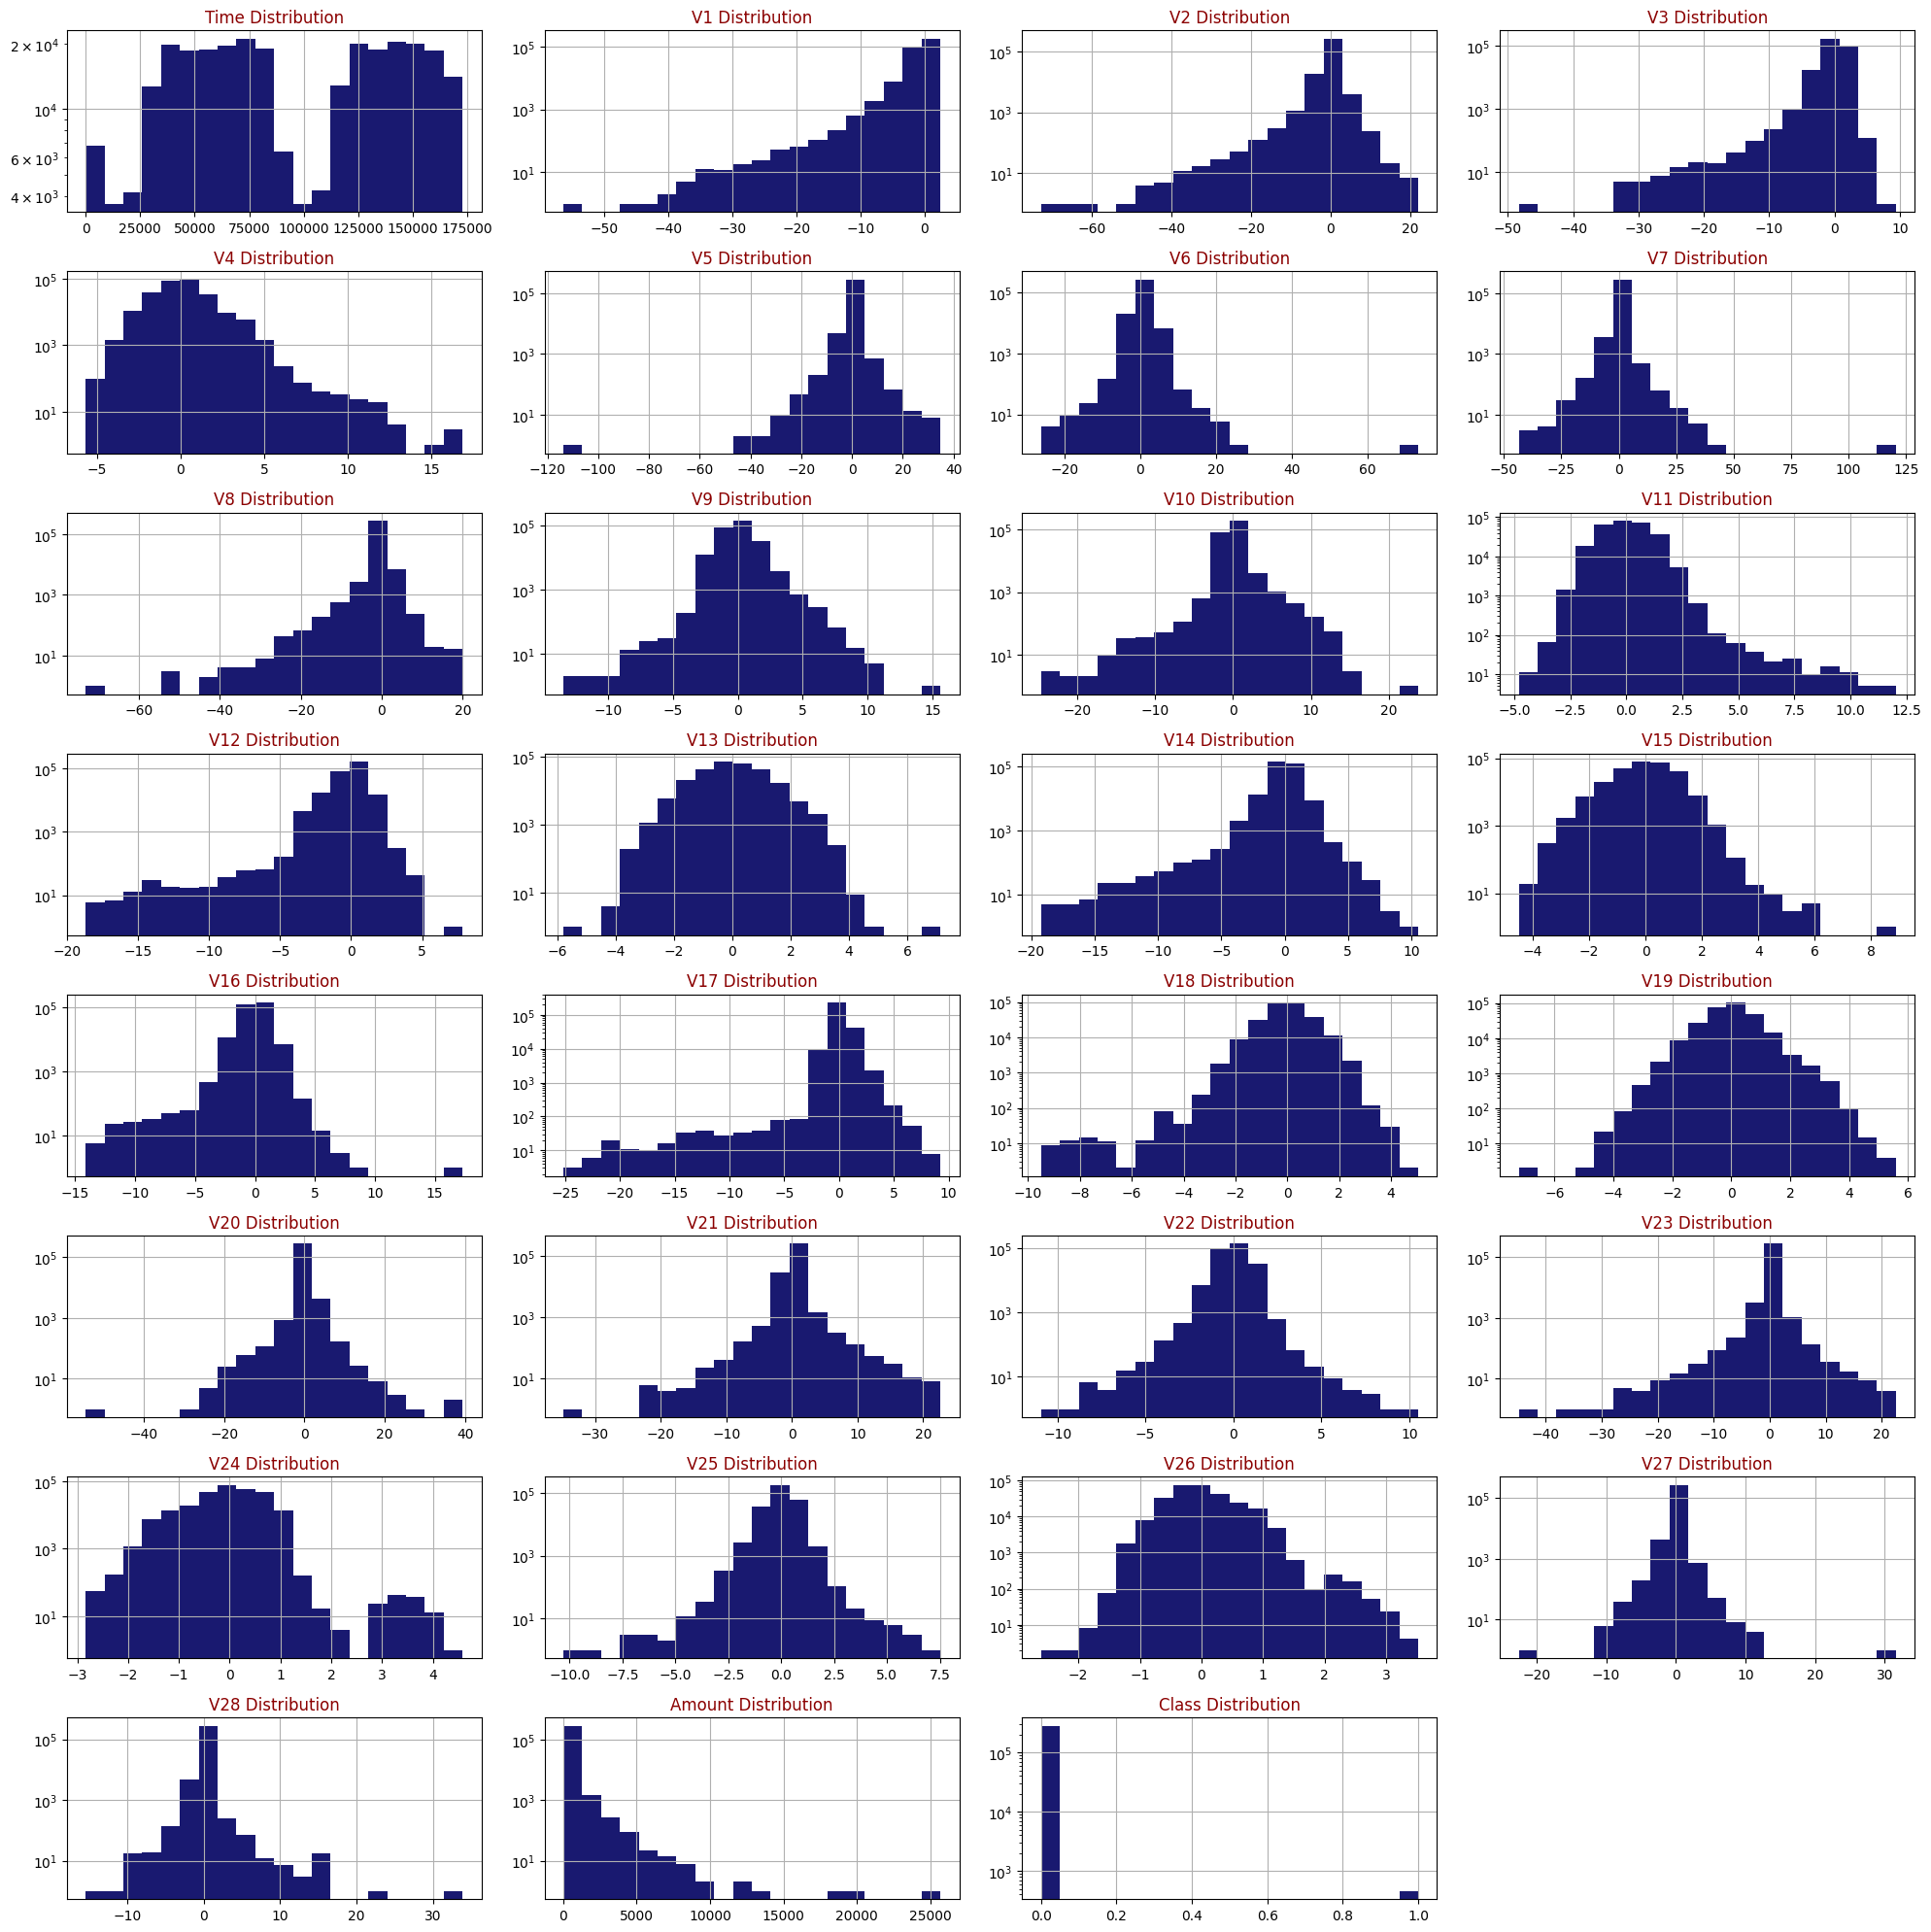

In [13]:
# Show the disrtribution of our data
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,8,4)

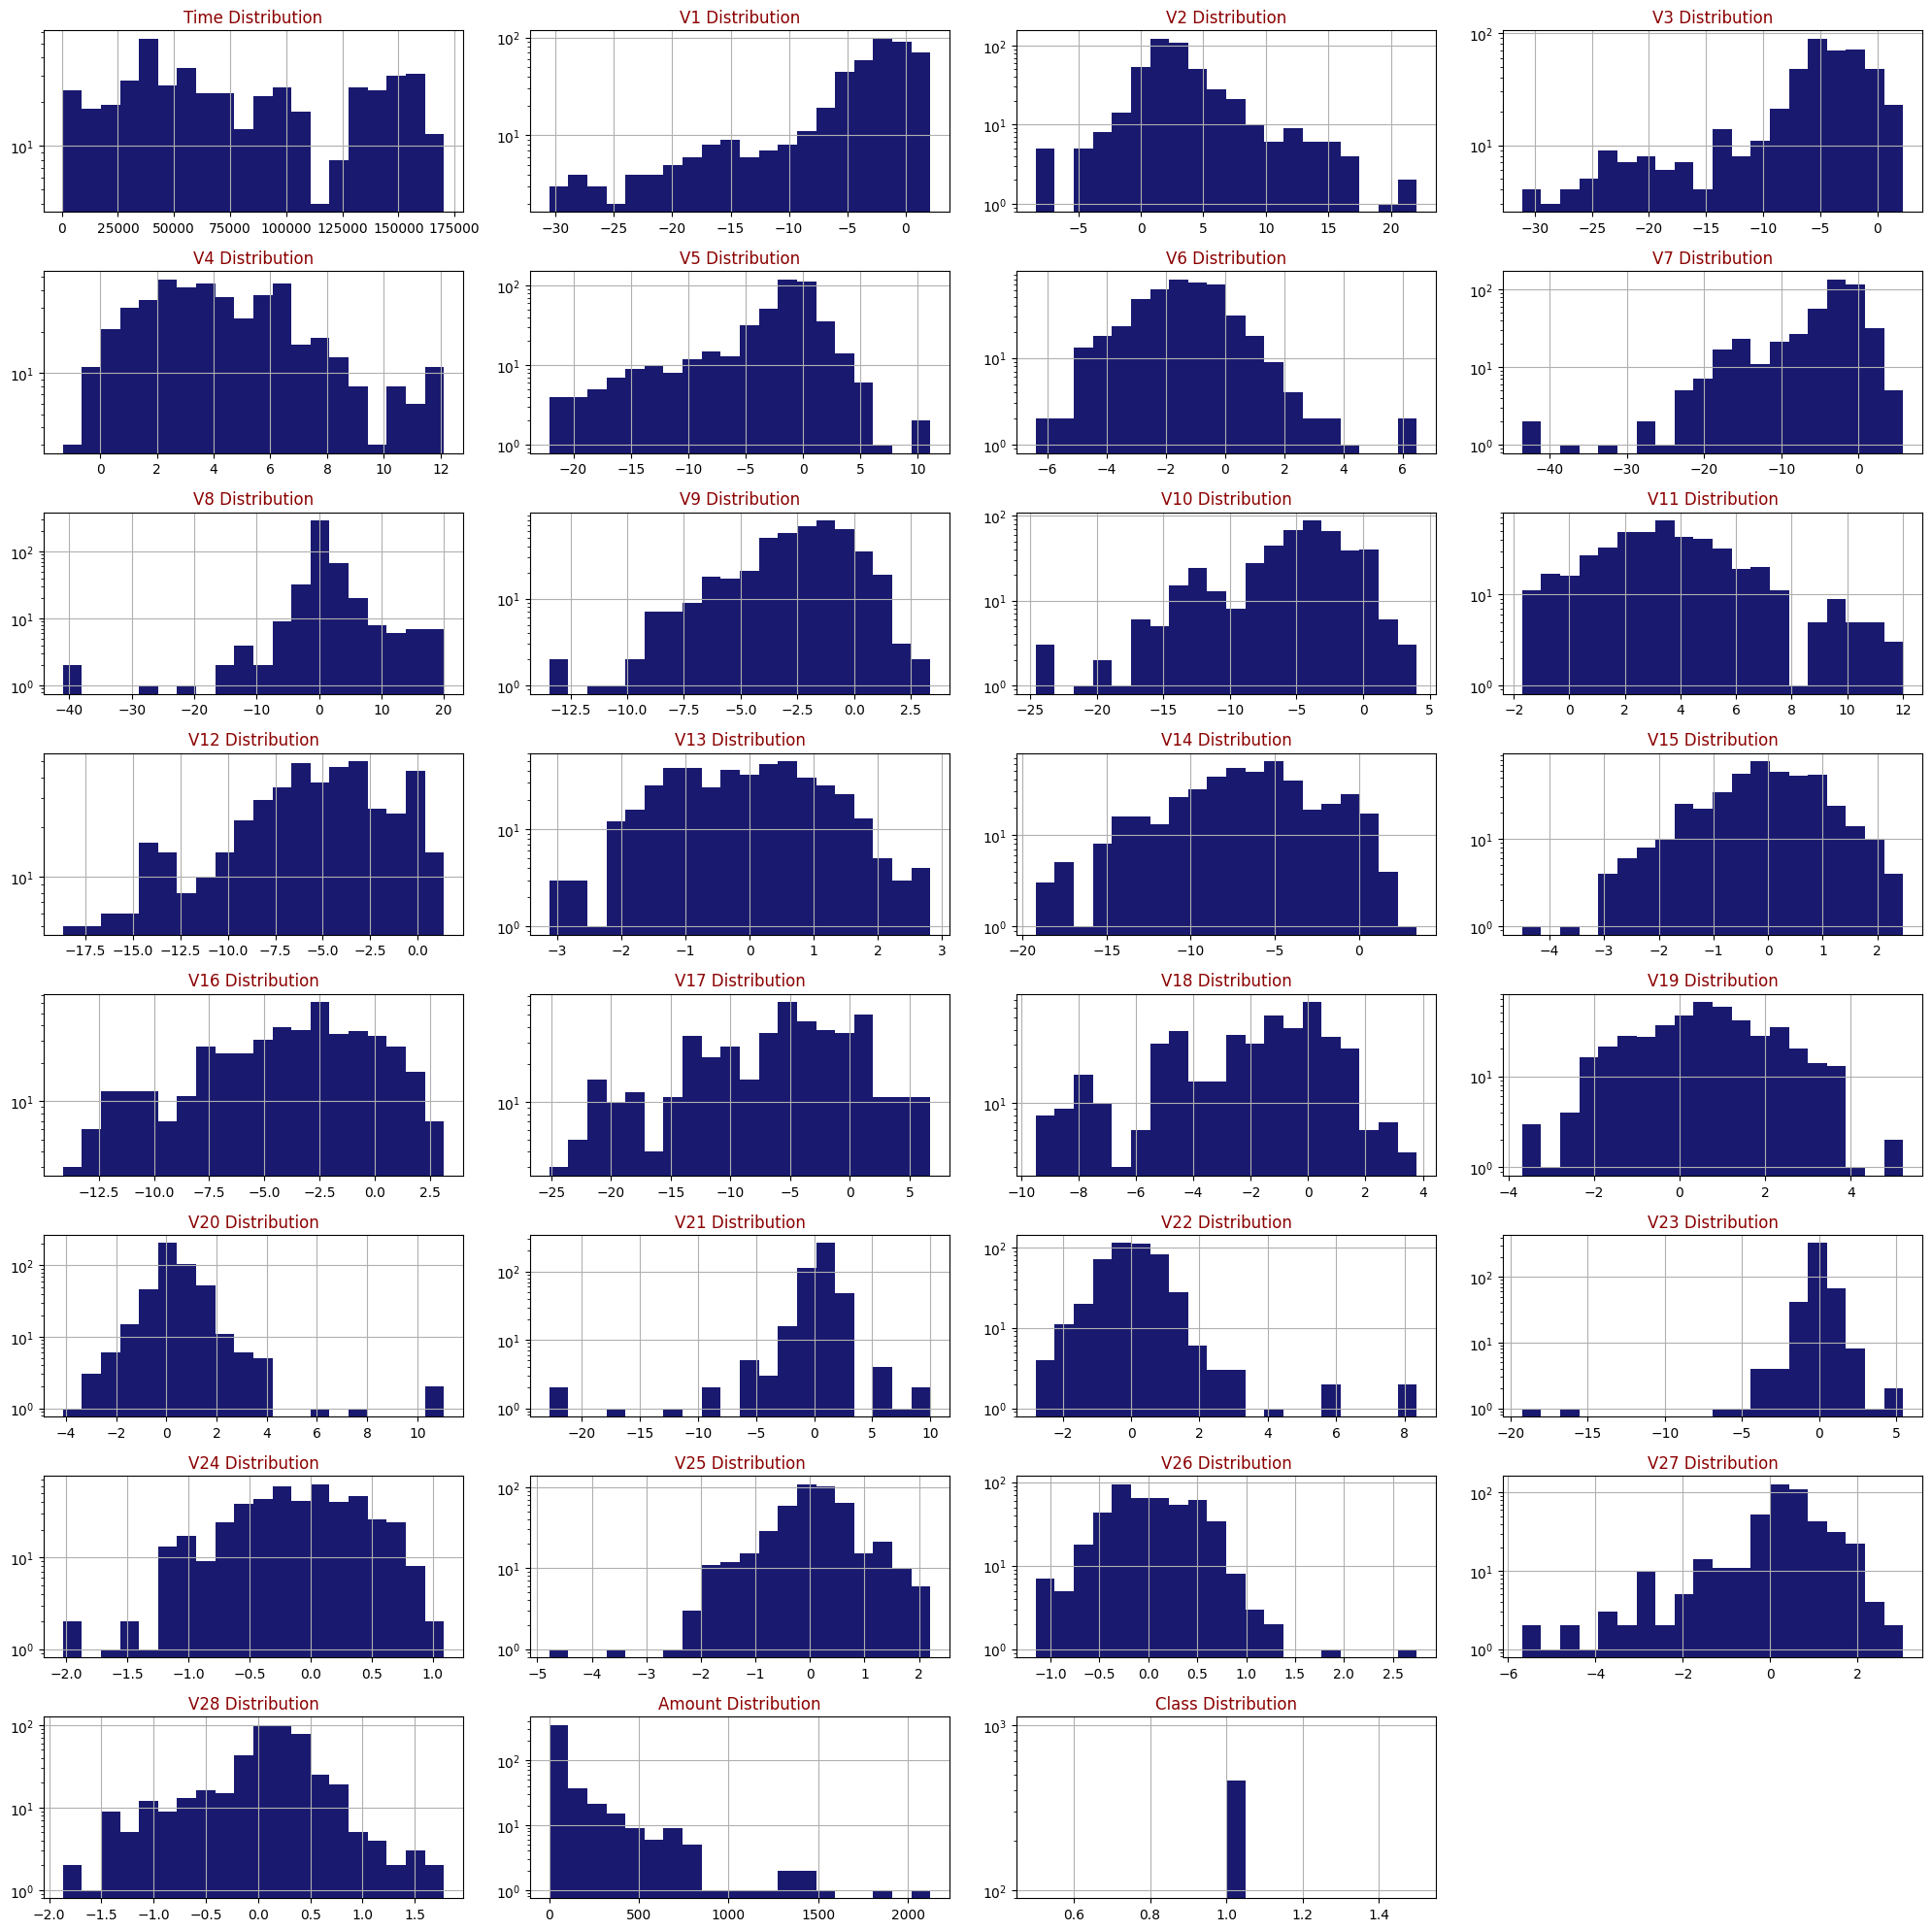

In [14]:
# Show the distribution of our Fraudulent Data
draw_histograms(df[df['Class'] == 1],df[df['Class'] == 1].columns,8,4)

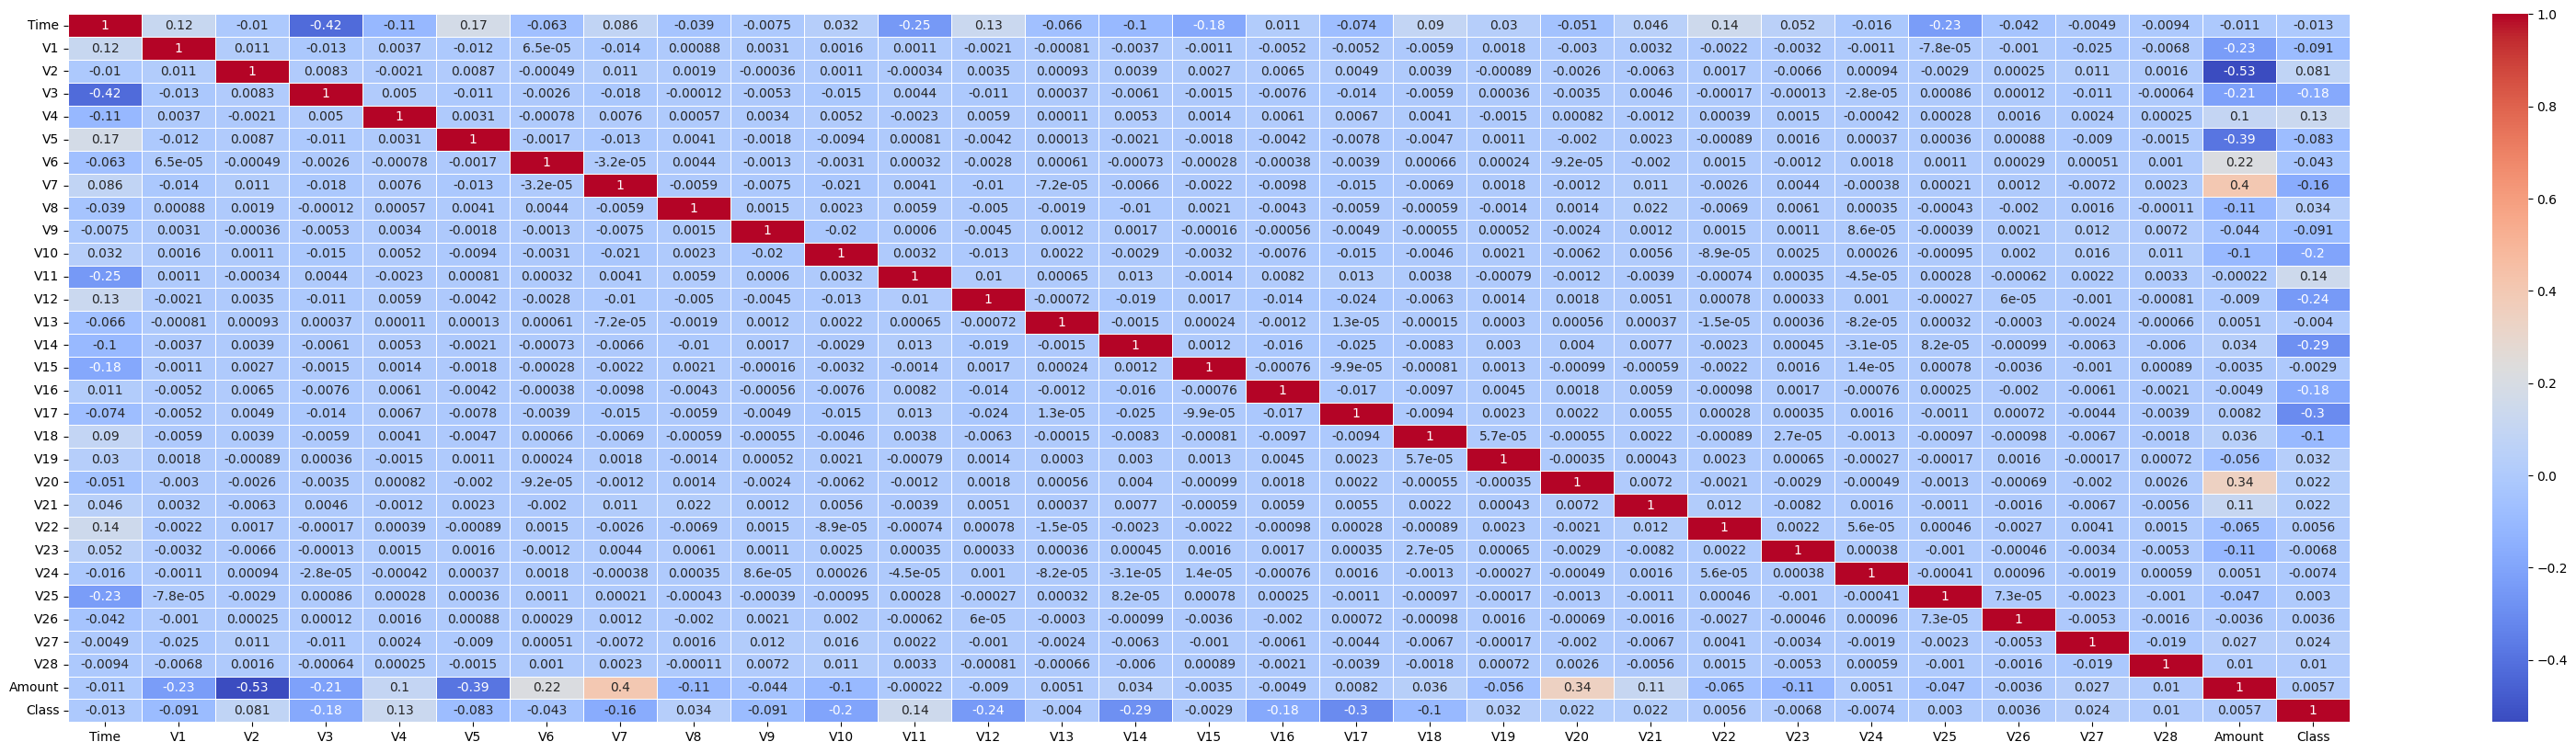

In [15]:
# Create a correlation matrix
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm", linewidth=0.5 )
plt.show()

Note: Transactions Amounts mean is at 88.53 Data is right skewed Fraudulent Transaction Amounts mean is at 124 dollars Fraudulent Amount data is also right skewed. Most of our Fraudulent transactions are for low amounts Some features are highly correlated with our Amount feature.

We will also plot the Time vs Amount as a scatterplot

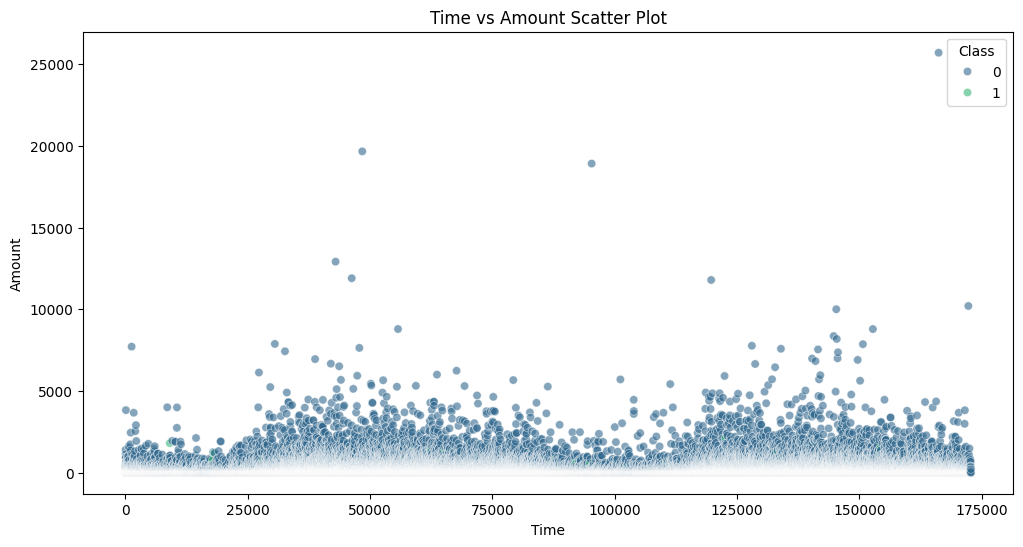

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

## **3. Pre-Process Data**

Now, we create a dataframe for legitimate and fraudulent transactions, named legitimate and fraudulent respectively

In [17]:
# Create a dataframe for legit and fraudulent transactions
legitimate = df[df['Class'] == 0]
fraudulent = df[df['Class'] == 1]

print(legitimate.shape)
print(fraudulent.shape)

(282493, 31)
(460, 31)


Statistics of the new dataframes:

In [18]:
print('Legitimate Transactions')
print(legitimate.describe())
print('-----------------------')
print('Fraudulent Transactions')
print(fraudulent.describe())

Legitimate Transactions
                Time             V1             V2             V3  \
count  282493.000000  282493.000000  282493.000000  282493.000000   
mean    94840.240208       0.017304      -0.012241       0.013551   
std     47473.169149       1.916398       1.631278       1.456399   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54239.000000      -0.910347      -0.602990      -0.883710   
50%     84722.000000       0.024817       0.061489       0.182419   
75%    139305.000000       1.317128       0.794833       1.028302   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  282493.000000  282493.000000  282493.000000  282493.000000   
mean       -0.011850       0.007926       0.000553       0.011110   
std         1.398474       1.354971       1.330148       1.176517   
min        -5.683171    -113.743307     -26.160506     -31.764946   
25%      

Next, we create a sample of 460 legitimate transactions from the newly created legitimate dataframe. After creating the sample, we will then concatanate the sample with the fraud dataset, creating a new dataset: new_df to run regression, in order to take care of the count imbalance of the legitimate and fraudulent transactions

In [19]:
# Create a sample of legitimate transactions
legitimate_sample = legitimate.sample(n=460)
legitimate_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241282,150963.0,2.130458,0.682574,-3.324150,0.649173,1.378417,-1.484688,0.809508,-0.458960,0.067498,...,-0.091409,-0.061782,-0.077941,0.299609,0.436743,0.698035,-0.082966,-0.016198,0.76,0
86639,61328.0,-2.896356,-1.293197,1.642300,1.407241,-0.685696,0.456861,0.486353,0.514540,-0.439380,...,-0.008617,0.521390,1.599583,0.002909,0.729060,-0.198291,0.237073,-0.251335,304.06,0
157131,109565.0,-1.005524,-0.553703,0.697661,0.157413,1.835214,-0.697030,0.014980,-0.123619,2.075293,...,0.112211,0.675201,-0.170970,0.504100,0.076827,0.717230,-0.118892,-0.027939,36.33,0
140683,83869.0,1.274762,0.209203,0.142204,0.370627,0.154048,-0.031999,-0.002087,-0.039071,0.030631,...,-0.279224,-0.748078,0.056182,-0.759427,0.271380,0.174681,-0.010904,0.008227,2.69,0
173660,121586.0,-0.495756,0.473229,1.427052,-0.809205,0.035634,0.160968,0.142370,0.304089,0.307975,...,0.227419,0.850734,-0.250609,-0.422952,-0.333687,0.564242,0.363888,0.205338,11.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213339,139215.0,-1.011391,0.276806,0.130744,-1.503105,-0.065662,-0.523033,0.488274,0.127691,-1.683527,...,0.026609,0.438521,-0.175221,0.780695,0.282054,0.843649,-0.170882,0.021975,78.80,0
206262,136141.0,2.014004,-0.377470,-0.293184,0.302527,-0.782173,-0.709777,-0.604032,-0.082509,1.077268,...,0.179511,0.683435,0.205083,0.039150,-0.364601,0.655548,-0.031324,-0.050049,1.00,0
193804,130298.0,-0.261531,0.562187,1.054885,0.245702,-0.338500,-0.001604,0.458603,-0.071069,0.158587,...,-0.162608,-0.380307,0.180100,1.087587,-0.902495,-0.009280,-0.090019,0.030042,88.48,0
127845,78493.0,-0.388703,1.086338,1.265482,0.012904,0.219526,-0.505961,0.653772,0.056276,-0.421535,...,-0.232870,-0.563265,0.019460,0.026382,-0.227517,0.101003,0.262106,0.095387,5.99,0


In [20]:
# Concat legit sample with fraud dataset
new_df = pd.concat([legitimate_sample, fraudulent], axis=0)
new_df.shape

(920, 31)

In [21]:
# Check the value counts of new data
new_df['Class'].value_counts()

Class
0    460
1    460
Name: count, dtype: int64

In [22]:
# Split data into x and y
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
241282,150963.0,2.130458,0.682574,-3.324150,0.649173,1.378417,-1.484688,0.809508,-0.458960,0.067498,...,-0.126520,-0.091409,-0.061782,-0.077941,0.299609,0.436743,0.698035,-0.082966,-0.016198,0.76
86639,61328.0,-2.896356,-1.293197,1.642300,1.407241,-0.685696,0.456861,0.486353,0.514540,-0.439380,...,-0.237836,-0.008617,0.521390,1.599583,0.002909,0.729060,-0.198291,0.237073,-0.251335,304.06
157131,109565.0,-1.005524,-0.553703,0.697661,0.157413,1.835214,-0.697030,0.014980,-0.123619,2.075293,...,0.251179,0.112211,0.675201,-0.170970,0.504100,0.076827,0.717230,-0.118892,-0.027939,36.33
140683,83869.0,1.274762,0.209203,0.142204,0.370627,0.154048,-0.031999,-0.002087,-0.039071,0.030631,...,-0.067242,-0.279224,-0.748078,0.056182,-0.759427,0.271380,0.174681,-0.010904,0.008227,2.69
173660,121586.0,-0.495756,0.473229,1.427052,-0.809205,0.035634,0.160968,0.142370,0.304089,0.307975,...,0.039801,0.227419,0.850734,-0.250609,-0.422952,-0.333687,0.564242,0.363888,0.205338,11.50


In [23]:
# Check y
y

241282    0
86639     0
157131    0
140683    0
173660    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 920, dtype: int64

In [24]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(920, 30) (736, 30) (184, 30)


## **4. Model**

Logistic Regression

In [26]:
# Create model Logistic Regression Model
model = LogisticRegression()

In [27]:
# Train model on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Evaluate training data on accuracy
X_train_pred = model.predict(X_train)
training_df_accuracy = accuracy_score(X_train_pred, y_train)
print(f'Training Data Accuracy: {training_df_accuracy}')

Training Data Accuracy: 0.9252717391304348


In [29]:
# Evaluate test data on accuracy
X_test_pred = model.predict(X_test)
test_df_accuracy = accuracy_score(X_test_pred, y_test)
print(f'Test Data Accuracy: {test_df_accuracy}')

Test Data Accuracy: 0.9130434782608695


In [30]:
# Generate a confusion matrix on our Test Data
cm = confusion_matrix(y_test, X_test_pred)
report = classification_report(y_test, X_test_pred, target_names=['Legit', 'Fraud'])

print('Confusion Matrix')

print(cm)

print('-----------------')
print("Classification Report")
print(report)

Confusion Matrix
[[85  7]
 [ 9 83]]
-----------------
Classification Report
              precision    recall  f1-score   support

       Legit       0.90      0.92      0.91        92
       Fraud       0.92      0.90      0.91        92

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [31]:
# Print out scores for model
from sklearn.metrics import recall_score, f1_score, precision_score
print(f'Recall: {recall_score(y_test, X_test_pred)}')
print(f'F1: {f1_score(y_test, X_test_pred)}')
print(f'Precision: {precision_score(y_test, X_test_pred)}')

Recall: 0.9021739130434783
F1: 0.9120879120879122
Precision: 0.9222222222222223


## **5. Evaluation**


The model scored a 93% accuracy score on Training Data and a 89% accuracy score on Test Data








There is not a big gap in scores suggesting is generalizing effectively.








The model scored a 83% recall score on Training Data

We must work to improve this score since ~16% of fraud cases are not being detected.

The model had 15 False Negatives:








15 predictions were labeled as False when they were actually True


This can cost the bank a substantial amount of money in a case of millions of transactions.

The model had 5 False Positives:

5 predictions were labeled as True when they were actually false.

This can damage the banks reputation and waste a customers time.

Overall the model did a good job of learning, but we must strive for a better model when we deal with other peoples money.